In [1]:
import pandas as pd
import networkx as nx
import pymysql
import numpy as np
from matplotlib import pyplot as plt

In [2]:
conn = pymysql.connect(host="*******",user='******',password="******",database="juejin")

In [3]:
sql = '''
      select followerId,followeeId from <tablename>;
      '''

In [4]:
df = pd.read_sql_query(sql, conn)

In [5]:
df.head()

,followerId,followeeId
0,5aae85666fb9a028e33b3b35,5c936c626fb9a070cb24aee5
1,5aae85666fb9a028e33b3b35,551d677ee4b0cd5b623f49cb
2,5aae85666fb9a028e33b3b35,5c10ad386fb9a049f9126e49
3,5aae85666fb9a028e33b3b35,5cb1529d6fb9a0687d1170ea
4,5aae85666fb9a028e33b3b35,58131b84da2f60005db28799


In [6]:
df.tail()

,followerId,followeeId
132504,5ad56b20f265da23a2299897,5a91037cf265da4e8b2ff784
132505,5ad56b20f265da23a2299897,58b61f4161ff4b006ccba5fd
132506,5ad56b20f265da23a2299897,5ad1d166f265da237b22846c
132507,5ad56b20f265da23a2299897,58afa29aac502e0069c5d756
132508,5ae038c0f265da0b8e7f1237,5ad471ca6fb9a028d82c3dbf


In [7]:
df[df.duplicated()].count()

followerId    0
followeeId    0
dtype: int64

In [8]:
G = nx.DiGraph()
df.apply(lambda row: G.add_edge(row['followerId'], row['followeeId']), axis=1);

In [9]:
pagerank_list = nx.pagerank(G,alpha = 1)

In [10]:
G.number_of_nodes()

22456

In [11]:
def show_graph(graph, layout = 'spring_layout'):
    if layout == 'circular_layout':
        positions = nx.circular_layout(graph)
    else:
        positions = nx.spring_layout(graph)
    nodesize = [x['pagerank']*200000 for v,x in graph.nodes(data = True)]
    edgesize = [10 for e in graph.edges(data = True)]
    nx.draw_networkx_nodes(graph,positions,node_size = nodesize, alpha = 0.4)
    nx.draw_networkx_edges(graph,positions,edge_size = edgesize, alpha = 0.2)
    nx.draw_networkx_labels(graph,positions,font_size = 10)

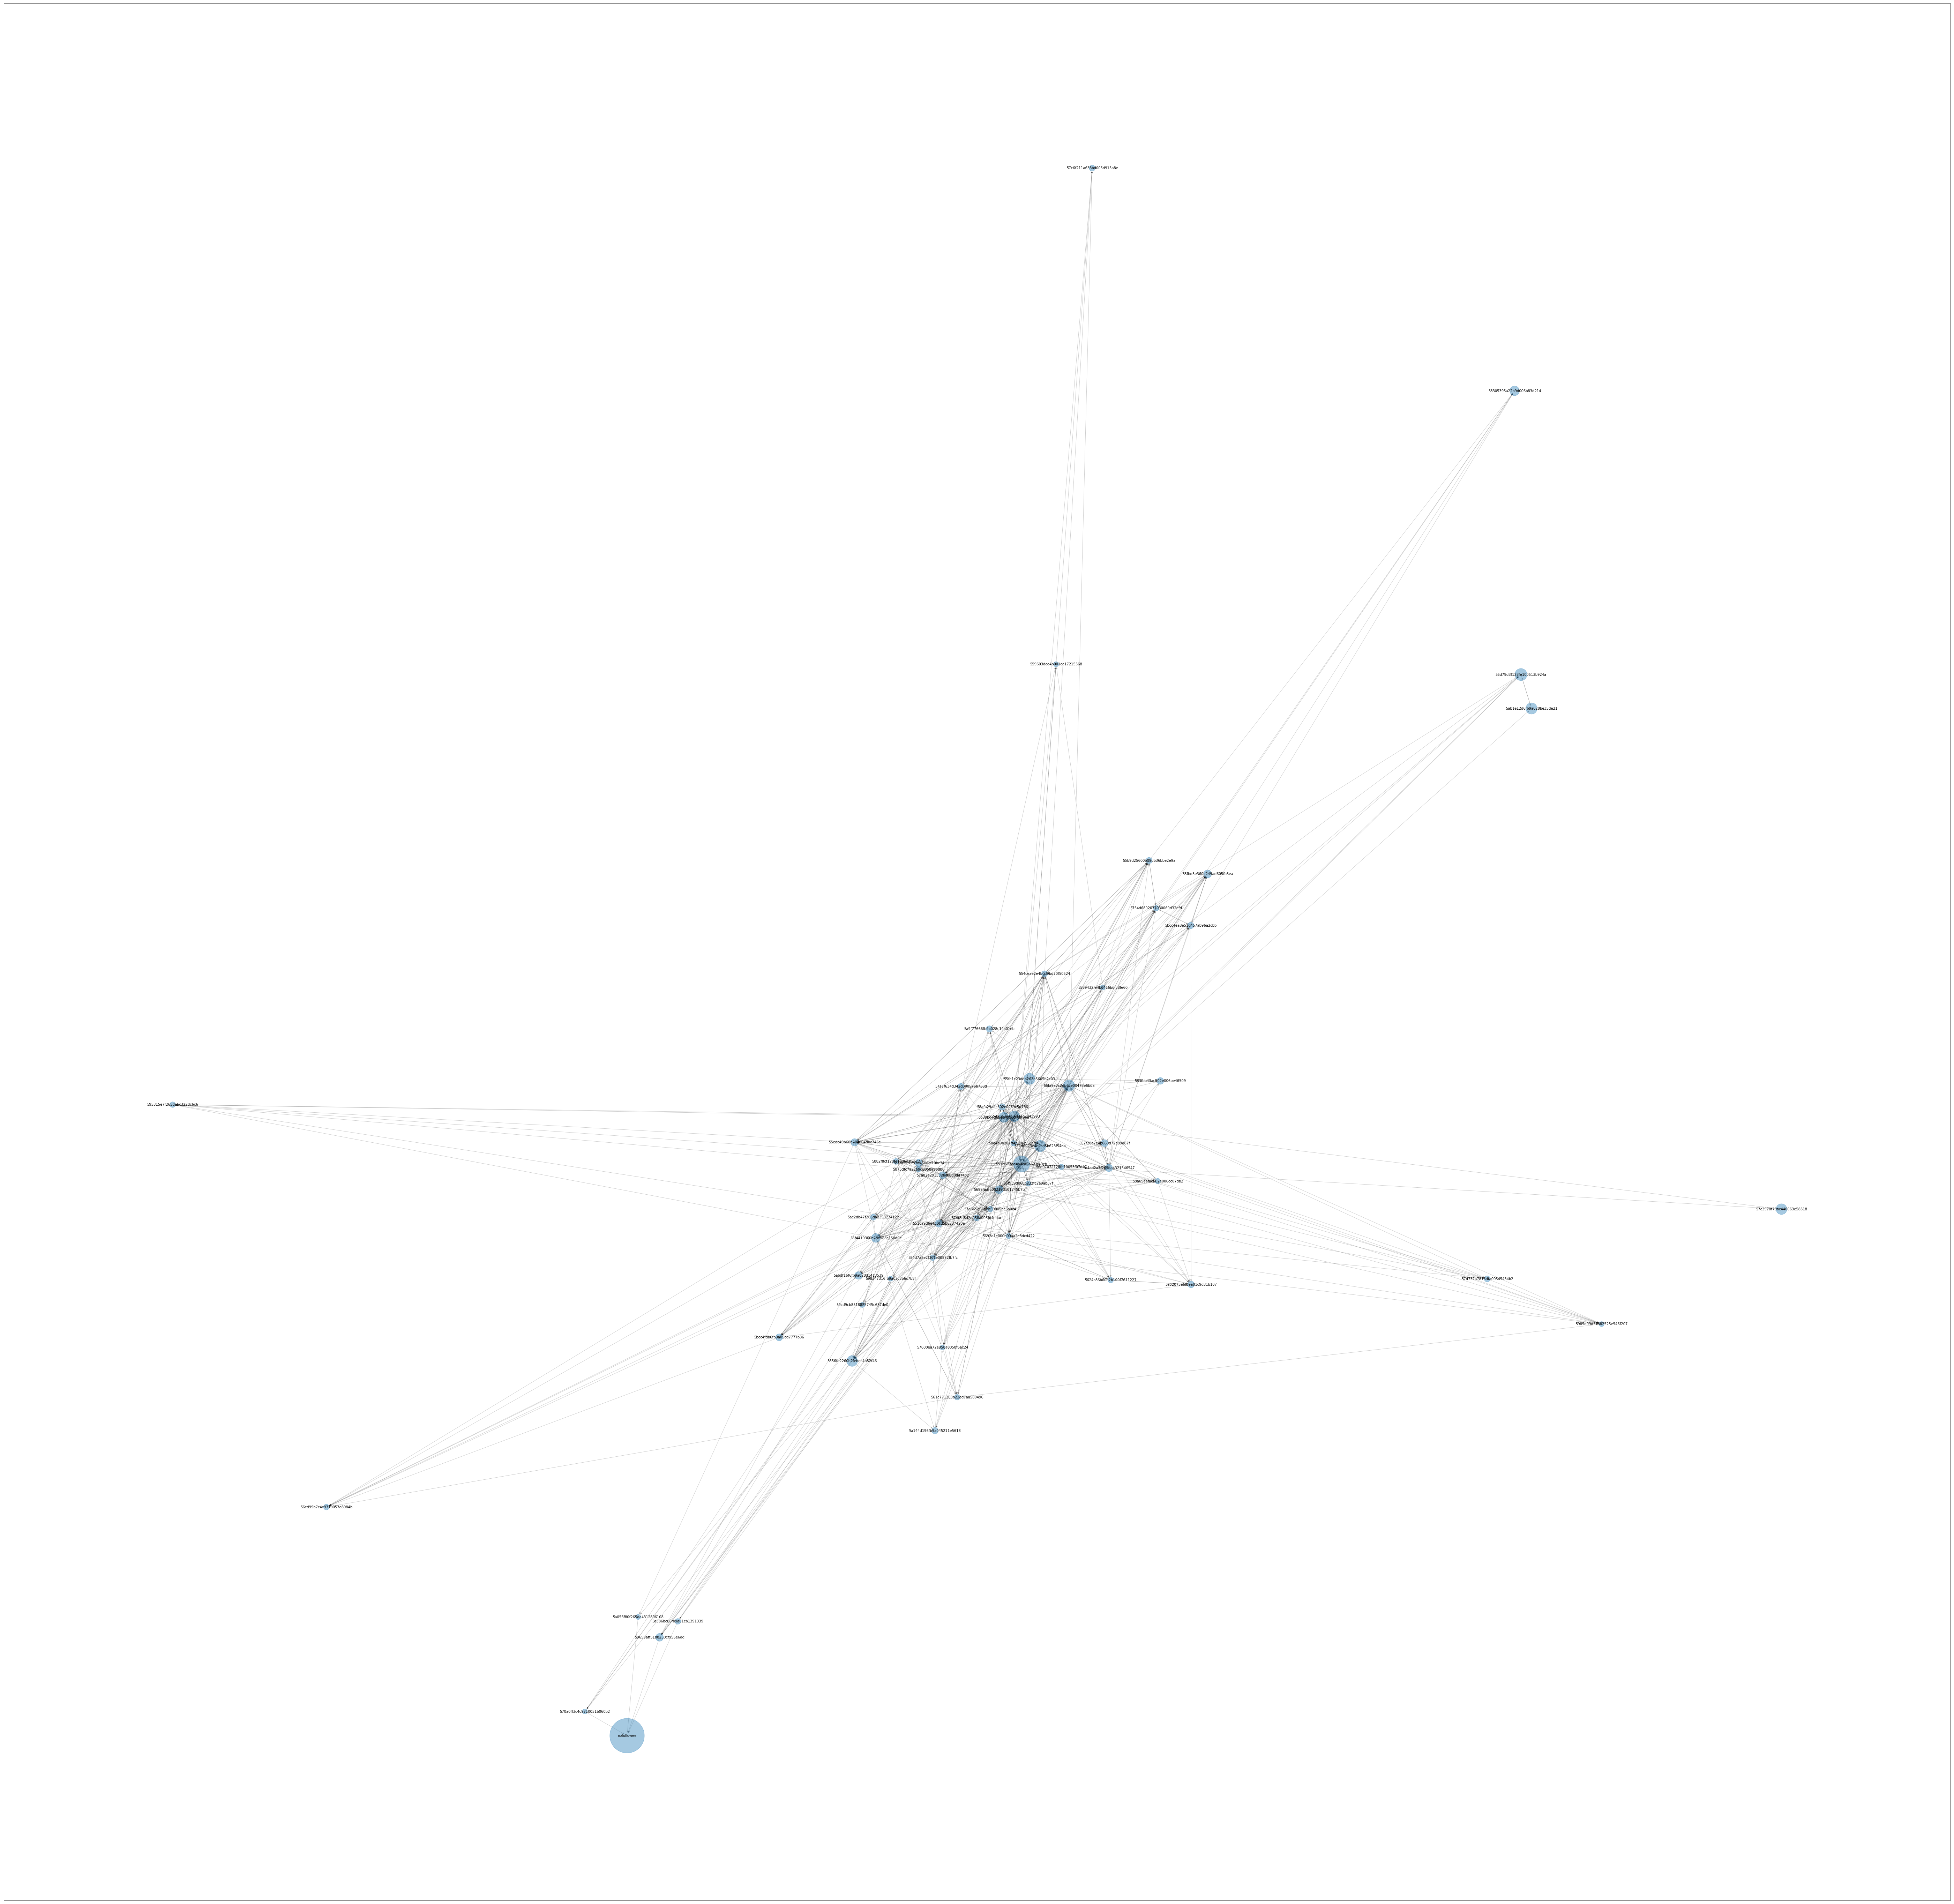

In [12]:
pagerank_threshold = 0.001
nx.set_node_attributes(G,name = 'pagerank',values = pagerank_list)
small_g = G.copy()
for n,p_rank in G.nodes(data = True):
    if p_rank['pagerank'] < pagerank_threshold:
        small_g.remove_node(n)
fig=plt.figure(figsize=(100,100))
ax = fig.add_subplot(111)
show_graph(small_g)
plt.show()